In [1]:
from google.colab import drive
import os
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits
from scipy.integrate import quad
from scipy import integrate as intg
import sympy as sp
from scipy import stats
from scipy.interpolate import UnivariateSpline
import pandas as pd
from scipy.stats import linregress
from scipy.stats import norm
import os
import seaborn as sns
from matplotlib import pyplot as plt, patches

rng = np.random.default_rng()


Problem 2 Hw 2


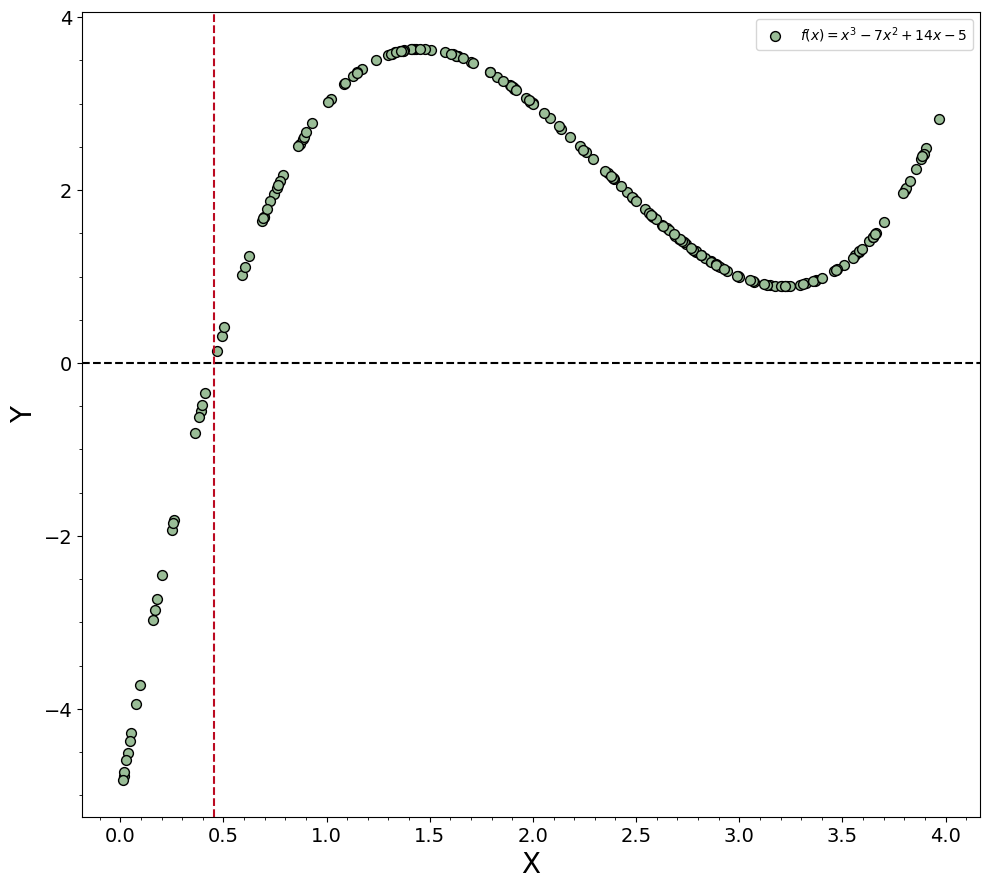

In [2]:

#Here is the function and the 1st derivative of the func
def prob1y(x):
  return (x**3)-(7*(x**2))+(14*x)-5

def prob1dy(x):
    return (3*(x**2)) - (14*x) + 14

#Not sure that we really need to plot, but I want to see what x does at various points of the function.
#integerlist = np.random.randint(1,10,20)
#integerlist = np.random.default_rng((0,10),100)
integerlist = np.random.uniform(low=0, high=4, size=200)
yvallist = []
for i in range (len(integerlist)):
  plotval = prob1y(integerlist[i])
  yvallist.append(plotval)
  #print(plotval)
yvallist1 = np.array(yvallist)
#print (integerlist,yvallist1)
plt.figure(figsize=(10, 9))

plt.scatter(integerlist,yvallist1,color = "#9ABD97" ,s = 50, edgecolors='black',label='$f(x) = x^3 - 7x^2 + 14x - 5$')
plt.axhline(y=0, color='k', linestyle='--')
plt.axvline (x=0.45318, linestyle = 'dashed', color = '#BB0A21')

#vertical line for newton raphson
#plt.axvline (x=0.45318, linestyle = 'dashed', color = '#BB0A21')



#All matplotlib stuff

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.minorticks_on()
plt.xlabel("X", fontsize=20)
plt.ylabel("Y", fontsize=20)
plt.legend()

plt.tight_layout()
#plt.savefig('fig1',dpi = 300)
plt.show()

In [49]:
#error min given by prof
errorthres = 1e-8


#below I make the bisection array
bisectarray = []
steps=[]
def bisect(func, x_lower, x_upper, errorthreshold):
    iteration = 0
    steps=[]

    if func(x_lower) * func(x_upper) >= 0:
        print("ERROR! Need opposite signs for the two guesses")
        return None, iteration, steps
    #print(f"{'Iter':<5} {'x_lower':<12} {'x_upper':<12} {'midpoint':<12} {'f(mid)':<12}")
    #this while loop is does the majority of the heavy lifting! It "churns" therough each iteration and recalculates the midpoint. Then passes it to the if loop

    while (x_upper - x_lower) / 2.0 > errorthreshold:
        midpoint = (x_lower + x_upper) / 2.0
        steps.append(midpoint)
        iteration += 1

        print(f"{iteration:<5} {midpoint:<12.6f} {func(midpoint):<12.6e}")
        #This if loop is like the step where we look and see whether we replace the higher or lower point

        if func(midpoint) == 0:
            return midpoint, iteration, steps
        elif func(x_lower) * func(midpoint) < 0:
            x_upper = midpoint

        else:
            #print ("replacing Lower with midpoint")

            x_lower = midpoint

    return (x_lower + x_upper) / 2.0, iteration, steps






root_bi, iter_bi, steps_bi = bisect(prob1y, 0, 1, errorthres)
print(f"stoping the bisect method prob 2 a answer: x = {root_bi:.9f} in {iter_bi} steps")


1     0.500000     3.750000e-01
2     0.250000     -1.921875e+00
3     0.375000     -6.816406e-01
4     0.437500     -1.311035e-01
5     0.468750     1.274109e-01
6     0.453125     -4.692078e-04
7     0.460938     6.381369e-02
8     0.457031     3.175813e-02
9     0.455078     1.566596e-02
10    0.454102     7.603751e-03
11    0.453613     3.568616e-03
12    0.453369     1.550040e-03
13    0.453247     5.405003e-04
14    0.453186     3.566727e-05
15    0.453156     -2.167650e-04
16    0.453171     -9.054755e-05
17    0.453178     -2.743981e-05
18    0.453182     4.113810e-06
19    0.453180     -1.166298e-05
20    0.453181     -3.774580e-06
21    0.453182     1.696162e-07
22    0.453182     -1.802482e-06
23    0.453182     -8.164327e-07
24    0.453182     -3.234082e-07
25    0.453182     -7.689601e-08
26    0.453182     4.636010e-08
stoping the bisect method prob 2 a answer: x = 0.453181721 in 26 steps


In [14]:

#below is the func for the Newton Rapson method which still doesnt quite work as of 02/19


def newton_raphson(func, firstderiv, x0, errorthreshold):
    iteration = 0
    x_churn = x0
    error = abs(func(x_churn))
    steps = [x0]

    #print(f"\n{'Iter'} {'x_current':<12} {'f(x)':<12} {'f\'(x)':<12}")

    while error > errorthreshold:
        iteration += 1
        fx = func(x_churn)
        dfx = firstderiv(x_churn)

        if dfx == 0:
            print("EROR! divide by zero ): ")
            return None, iteration, steps

        x_new = x_churn - (fx / dfx)
        error = abs(x_new - x_churn)
        steps.append(x_new)

        print(f"{iteration:<5} {x_churn:<12.6f} {fx:<12.6e} {dfx:<12.6f}")

        x_churn = x_new


    return x_churn, iteration, steps





root_nr, iter_nr, steps_nr = newton_raphson(prob1y, prob1dy, 0, errorthres)
print(f"stopping the NR method, prob 2a {root_nr:.9f} in {iter_nr} steps")

1     0.000000     -5.000000e+00 14.000000   
2     0.357143     -8.473032e-01 9.382653    
3     0.447448     -4.761133e-02 8.336355    
4     0.453159     -1.843597e-04 8.271828    
5     0.453182     -2.801860e-09 8.271577    
stopping the NR method, prob 2a 0.453181723 in 5 steps


5


In [18]:
nr_y_vals = [prob1y(x) for x in steps_nr]
markersize123 = 90

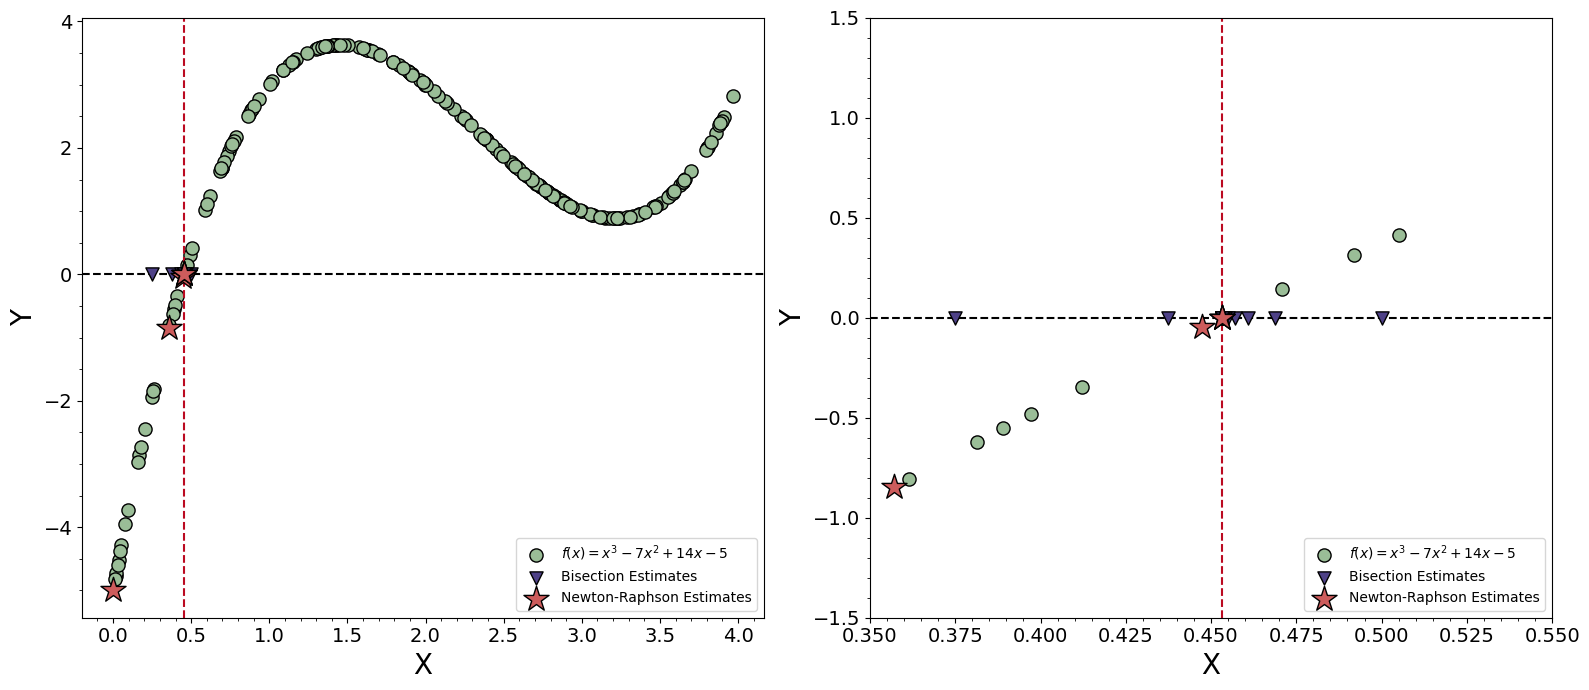

In [19]:
yvallist = []
for i in range(len(integerlist)):
  plotval = prob1y(integerlist[i])
  yvallist.append(plotval)
yvallist1 = np.array(yvallist)

# Ensure nr_y_vals is defined
nr_y_vals = [prob1y(x) for x in steps_nr]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))

# --- Panel 1: Original Plot ---
ax1.scatter(integerlist, yvallist1, color="#9ABD97", s=markersize123, edgecolors='black', label='$f(x) = x^3 - 7x^2 + 14x - 5$')
ax1.axhline(y=0, color='k', linestyle='--')
ax1.axvline(x=0.45318, linestyle='dashed', color='#BB0A21')



#Bisect values
ax1.scatter(steps_bi, [0]*len(steps_bi), color='#4E4187',  edgecolors='black',marker='v', s=90, label='Bisection Estimates', zorder=5)

#NR values
ax1.scatter(steps_nr, nr_y_vals, color='#CD5C5C', edgecolors='black', marker='*', s=4*markersize123, label='Newton-Raphson Estimates', zorder=6)

ax1.tick_params(axis='both', which='major', labelsize=14)
ax1.minorticks_on()
ax1.set_xlabel("X", fontsize=20)
ax1.set_ylabel("Y", fontsize=20)
ax1.legend()

# I find it very hard to see the actual values, so here I break it into two plts
ax2.scatter(integerlist, yvallist1, color="#9ABD97", s=markersize123, edgecolors='black', label='$f(x) = x^3 - 7x^2 + 14x - 5$')
ax2.axhline(y=0, color='k', linestyle='--')
ax2.axvline(x=0.45318, linestyle='dashed', color='#BB0A21')


ax2.scatter(steps_bi, [0]*len(steps_bi), color='#4E4187', edgecolors='black', marker='v', s=markersize123, label='Bisection Estimates', zorder=5)

#NR values
ax2.scatter(steps_nr, nr_y_vals, color='#CD5C5C', edgecolors='black', marker='*', s=4*markersize123, label='Newton-Raphson Estimates', zorder=6)


ax2.tick_params(axis='both', which='major', labelsize=14)
ax2.minorticks_on()
ax2.set_xlabel("X", fontsize=20)
ax2.set_ylabel("Y", fontsize=20)
ax2.legend(loc = 4)

ax2.set_xlim(0.35, 0.55)
ax2.set_ylim(-1.5, 1.5)

plt.tight_layout()
plt.savefig('fig2', dpi=300)
plt.show()

1     3.450000     1.046125e+00 1.407500    
2     2.706750     1.440024e+00 -1.915014   
3     3.458715     1.058646e+00 1.466116    
4     2.736639     1.383812e+00 -1.845366   
5     3.486524     1.102050e+00 1.656213    
6     2.821120     1.237152e+00 -1.619525   
7     3.585018     1.299695e+00 2.366812    
8     3.035885     9.667365e-01 -0.852596   
9     4.169759     4.167540e+00 7.784049    
10    3.634365     1.425752e+00 2.744713    
11    3.114911     9.130156e-01 -0.500744   
12    4.938227     1.385661e+01 18.023082   
13    4.169402     4.164755e+00 7.780106    
14    3.634093     1.425008e+00 2.742596    
15    3.114510     9.132168e-01 -0.502624   
16    4.931408     1.373407e+01 17.916648   
17    4.164855     4.129493e+00 7.730077    
18    3.630643     1.415593e+00 2.715707    
19    3.109382     9.158554e-01 -0.526577   
20    4.848643     1.230402e+01 16.647016   
21    4.109530     3.718480e+00 7.131294    
22    3.588099     1.307022e+00 2.389977    
23    3.04

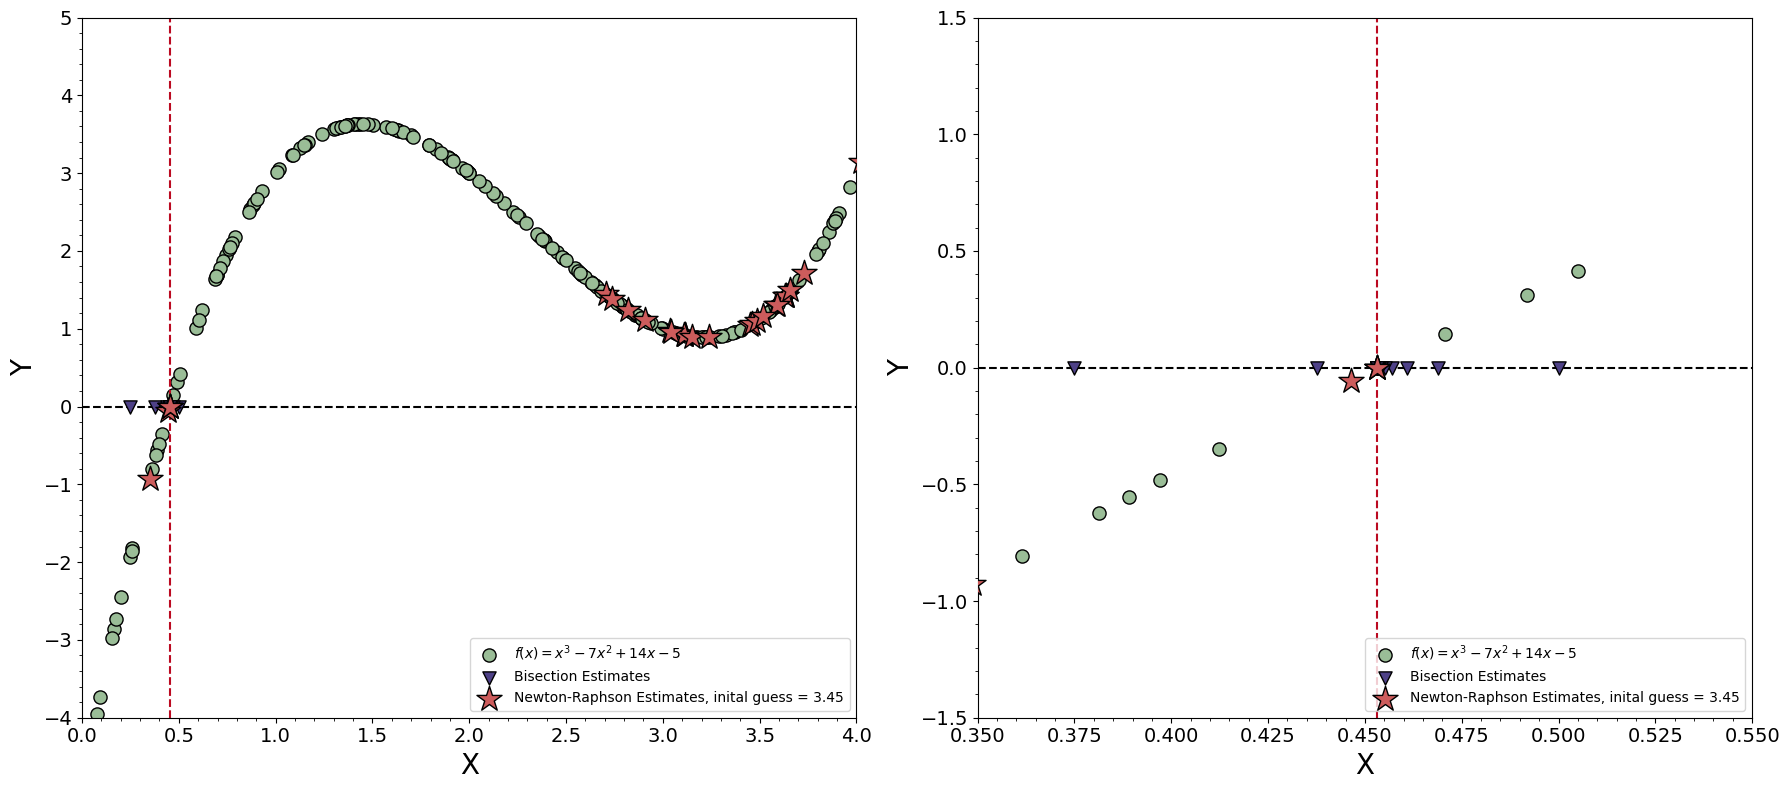

In [48]:
root_nr, iter_nr, steps_nr = newton_raphson(prob1y, prob1dy, 3.45, errorthres)

# Calc our y values
nr_y_vals = [prob1y(x) for x in steps_nr]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))
#this loop will plot our bisect and NR method for the "brroken" case wher eour initial guess is 3.45
for ax in [ax1, ax2]:
    ax.scatter(integerlist, yvallist1, color="#9ABD97", s=markersize123, edgecolors='black', label='$f(x) = x^3 - 7x^2 + 14x - 5$')
    ax.axhline(y=0, color='k', linestyle='--')
    ax.axvline(x=0.45318, linestyle='dashed', color='#BB0A21')

    ax.scatter(steps_bi, [0]*len(steps_bi), color='#4E4187', edgecolors='black', marker='v', s=markersize123, label='Bisection Estimates', zorder=5)
    ax.scatter(steps_nr, nr_y_vals, color='#CD5C5C', edgecolors='black', marker='*', s=4*markersize123, label='Newton-Raphson Estimates, inital guess = 3.45', zorder=6)

    ax.tick_params(axis='both', which='major', labelsize=14)
    ax.minorticks_on()
    ax.set_xlabel("X", fontsize=20)
    ax.set_ylabel("Y", fontsize=20)
    ax.legend(loc=4)
ax1.set_xlim(0,4)
ax1.set_ylim(-4,5)

ax2.set_xlim(0.35, 0.55)
ax2.set_ylim(-1.5, 1.5)
plt.savefig('broken.png', dpi=300)

plt.tight_layout()
plt.show()

# Question 3


1     0.500000     2.500000     1.500000     1.252507e-03
2     0.500000     1.500000     1.000000     -4.207355e-01
3     1.000000     1.500000     1.250000     -2.244923e-01
4     1.250000     1.500000     1.375000     -1.154465e-01
5     1.375000     1.500000     1.437500     -5.806460e-02
6     1.437500     1.500000     1.468750     -2.864890e-02
7     1.468750     1.500000     1.484375     -1.375900e-02
8     1.484375     1.500000     1.492188     -6.268458e-03
9     1.492188     1.500000     1.496094     -2.511780e-03
10    1.496094     1.500000     1.498047     -6.305878e-04
11    1.498047     1.500000     1.499023     3.107217e-04
12    1.498047     1.499023     1.498535     -1.599925e-04
13    1.498535     1.499023     1.498779     7.534972e-05
14    1.498535     1.498779     1.498657     -4.232511e-05
15    1.498657     1.498779     1.498718     1.651138e-05
16    1.498657     1.498718     1.498688     -1.290710e-05
17    1.498688     1.498718     1.498703     1.802083e-06
18

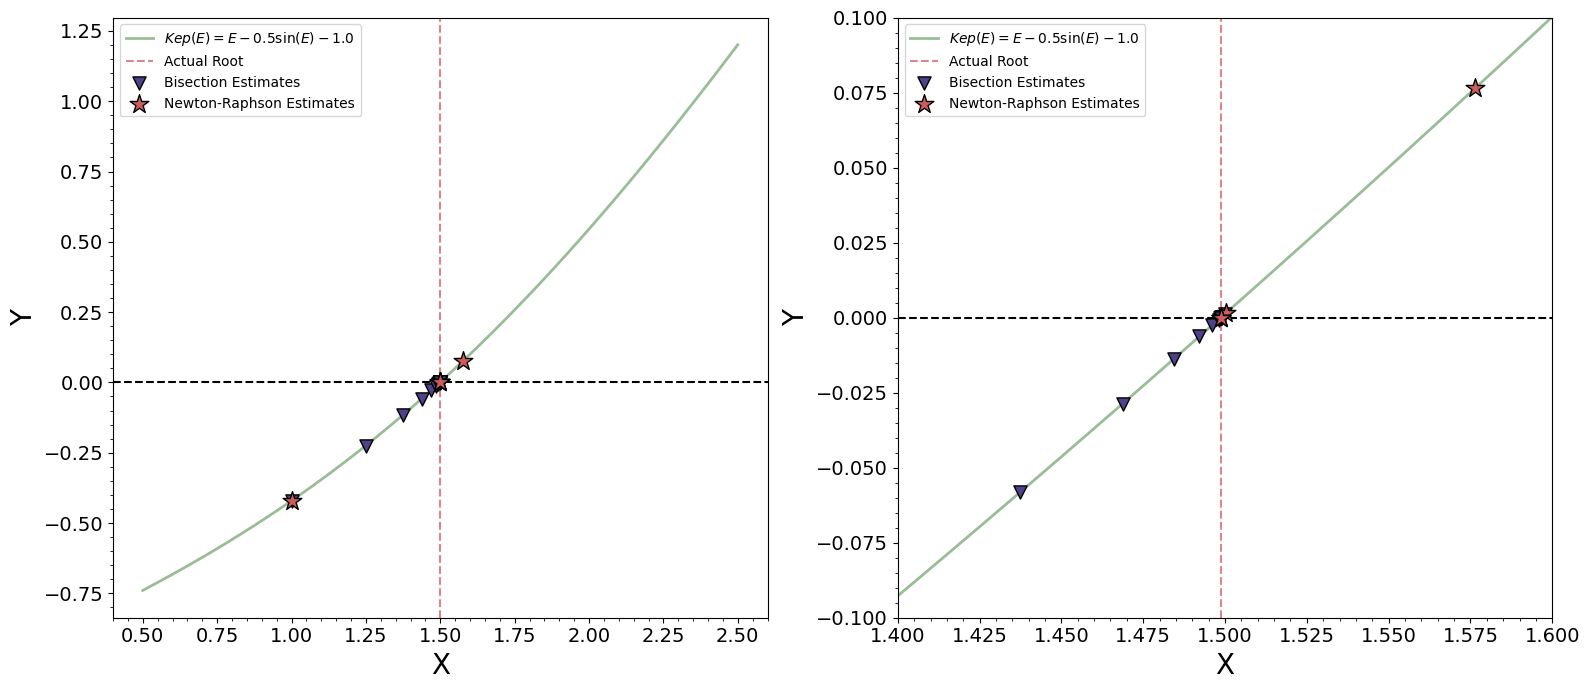

In [33]:
M_val = 1.0
e_val = 0.5
#Here we do the Keplerr eq  and the first derivative of the kepler eq
def Kep(E):
    return E - e_val * np.sin(E) - M_val

def d_Kep(E):
    return 1.0 - e_val * np.cos(E)
#below I do the bisection and the NR method
bisect_root, bisect_iter, bisect_steps = bisect(Kep, 0.5, 2.5, 1e-8)
nr_root, nr_iter, nr_steps = newton_raphson(Kep, d_Kep, M_val, 1e-8)
true_root = nr_steps[-1]

E_vals = np.linspace(0.5, 2.5, 200)
f_vals = Kep(E_vals)

bisect_y = [Kep(x) for x in bisect_steps]
nr_y = [Kep(x) for x in nr_steps]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))

for ax in [ax1, ax2]:
    ax.plot(E_vals, f_vals, color="#9ABD97", linewidth=2, label=r'$Kep(E) = E - 0.5\sin(E) - 1.0$')
    ax.axhline(y=0, color='k', linestyle='--')
    ax.axvline(x=true_root, linestyle='dashed', color='#BB0A21', alpha=0.5, label='Actual Root')
    ax.scatter(bisect_steps, bisect_y, color='#4E4187', edgecolors='black', marker='v', s=markersize123, label='Bisection Estimates', zorder=5)
    ax.scatter(nr_steps, nr_y, color='#CD5C5C', edgecolors='black', marker='*', s=200, label='Newton-Raphson Estimates', zorder=6)
    ax.tick_params(axis='both', which='major', labelsize=14)
    ax.minorticks_on()
    ax.legend()

ax2.set_xlim(1.4, 1.6)
ax2.set_ylim(-0.1, 0.1)
ax1.set_xlabel("X", fontsize=20)
ax1.set_ylabel("Y", fontsize=20)

ax2.set_xlabel("X", fontsize=20)
ax2.set_ylabel("Y", fontsize=20)
plt.tight_layout()
#plt.savefig('kepler_methods.png', dpi=300)
plt.show()

--- Running Bisection Method ---
1     0.500000     2.500000     1.500000     1.252507e-03
2     0.500000     1.500000     1.000000     -4.207355e-01
3     1.000000     1.500000     1.250000     -2.244923e-01
4     1.250000     1.500000     1.375000     -1.154465e-01
5     1.375000     1.500000     1.437500     -5.806460e-02
6     1.437500     1.500000     1.468750     -2.864890e-02
7     1.468750     1.500000     1.484375     -1.375900e-02
1     1.000000     -4.207355e-01 0.729849    
2     1.576469     7.647740e-02 1.002836    
3     1.500208     1.453420e-03 0.964735    


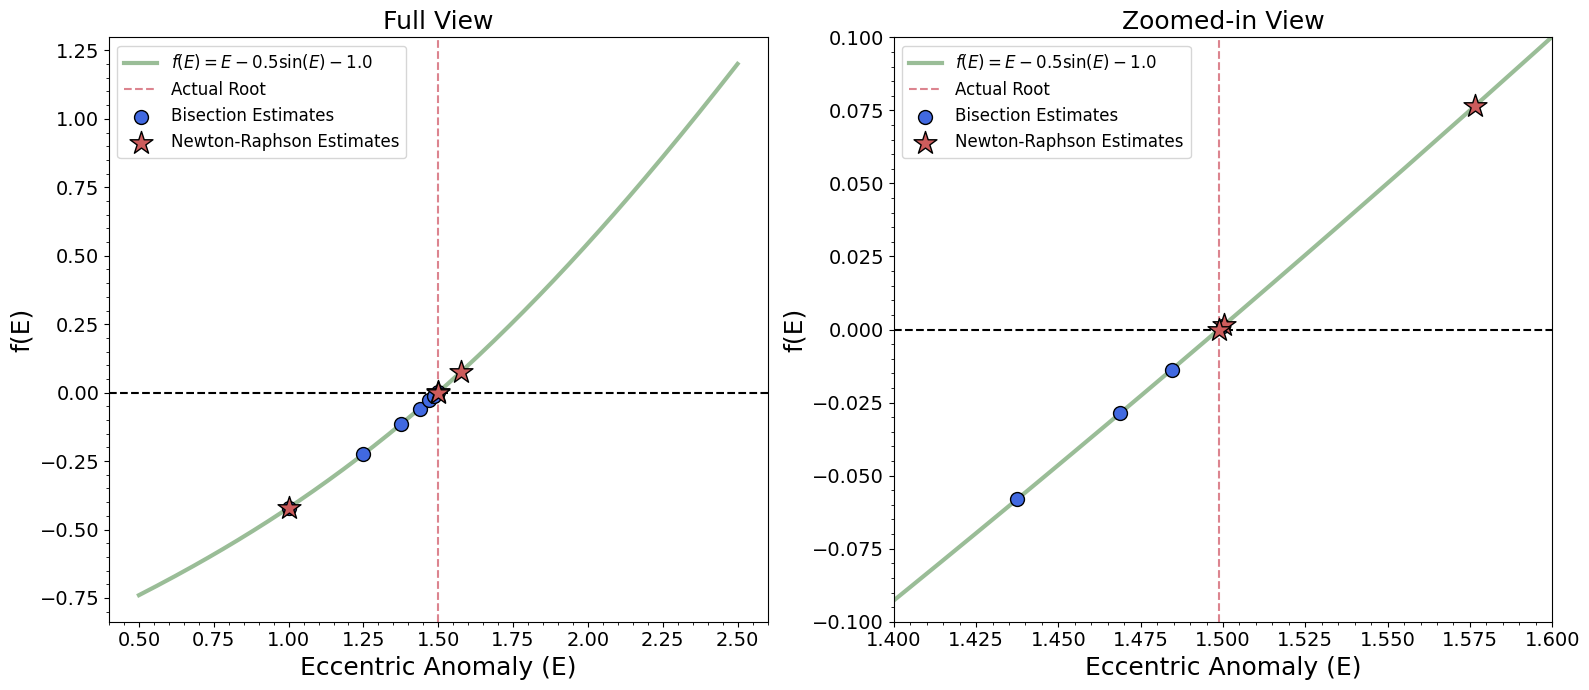

In [24]:
# Run your bisection function
print("--- Running Bisection Method ---")
bisect_root, bisect_iters, bisect_steps = bisect(Kep, 0.5, 2.5, 0.01)

# Run Newton-Raphson
nr_root, nr_iters, nr_steps = newton_raphson(Kep, d_Kep, M_val, 0.01)

# --- 3. Set Up Plotting Data ---
E_vals = np.linspace(0.5, 2.5, 200)
f_vals = Kep(E_vals)

bisect_y = [Kep(x) for x in bisect_steps]
nr_y = [Kep(x) for x in nr_steps]

# --- 4. Create the Two-Panel Plot ---
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))

for ax, title in zip([ax1, ax2], ["Full View", "Zoomed-in View"]):
    # Plot the main function curve
    ax.plot(E_vals, f_vals, color="#9ABD97", linewidth=3, label=r'$f(E) = E - 0.5\sin(E) - 1.0$')

    # Zero line and true root line
    ax.axhline(y=0, color='k', linestyle='--')
    ax.axvline(x=nr_root, linestyle='dashed', color='#BB0A21', alpha=0.5, label='Actual Root')

    # Plot Bisection steps
    ax.scatter(bisect_steps, bisect_y, color='#4169E1', edgecolors='black',
               marker='o', s=100, label='Bisection Estimates', zorder=5)

    # Plot Newton-Raphson steps
    ax.scatter(nr_steps, nr_y, color='#CD5C5C', edgecolors='black',
               marker='*', s=300, label='Newton-Raphson Estimates', zorder=6)

    ax.tick_params(axis='both', which='major', labelsize=14)
    ax.minorticks_on()
    ax.set_xlabel("Eccentric Anomaly (E)", fontsize=18)
    ax.set_ylabel("f(E)", fontsize=18)
    ax.set_title(title, fontsize=18)
    ax.legend(fontsize=12)

# Specific limits for zooming in on Panel 2
ax2.set_xlim(1.4, 1.6)
ax2.set_ylim(-0.1, 0.1)

plt.tight_layout()
plt.show()